In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

In [2]:
# Census API Key
from env.config import api_key

In [52]:
# Query 2014-2060 projected population
year='2014'
dsource='pep'
dname='projpop'
cols='POP,YEAR'
base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'
data_url = f'{base_url}?get={cols}&for=us:1&key={api_key}'
response=requests.get(data_url)

In [53]:
if response.status_code != 200:
    print ("Error!")
else:
    print ("Sucess!")
    response_json = response.json()

Sucess!


In [55]:
total_pop=[]
year=[]
for x in range(1,len(response_json)):
    total_pop.append(int(response_json[x][0]))
    year.append(int(response_json[x][1]))
#print(total_pop)
#print(len(total_pop))
#print(year)

In [42]:
growth_initial = total_pop[1] - total_pop[0]

growth_rate = []
avg_growth_rate = growth_initial

for x in range(2,len(total_pop)):
    if x == 2:
        growth_rate.append(growth_initial)
    else:
        growth_rate.append(total_pop[x] - total_pop[x-1])
    avg_growth_rate = int((avg_growth_rate + growth_rate[x-2])/2)
    #print(avg_growth_rate)


growth_rate_change = []
avg_growth_rate_change = 0
growth_rate_change_initial = growth_rate[0] - growth_rate[1]
for x in range(0,len(growth_rate)):
    if x == 0:
        growth_rate_change.append(growth_rate_change_initial)
    else:
        growth_rate_change.append(growth_rate[x-1] - growth_rate[x])
    avg_growth_rate_change = int((growth_rate_change[x-1] + growth_rate_change[x])/2)

print(growth_initial)
print(avg_growth_rate)
print(avg_growth_rate_change) 

2620847
1887651
-10547


In [39]:
proj_pop = total_pop.copy()
proj_year = year.copy()

new_growth_rate = avg_growth_rate
while new_growth_rate > 0:
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change   
    #print(new_growth_rate)

#print(proj_pop)
#print(proj_year)

In [22]:
# Extend the data another 50 years
for x in range(50):
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change 
#print(proj_pop)
#print(proj_year)

In [23]:
# Now reduce the population rates from 2019 on by the NIM change from 2018
nim_decrease = 1001528 - 595348
nim_total_pop = total_pop.copy()
#nim_total_pop = [x - nim_decrease for x in nim_total_pop]
#print(nim_total_pop)

In [24]:
nim_growth_initial = nim_total_pop[1] - nim_total_pop[0]
nim_growth_rate = []
nim_avg_growth_rate = nim_growth_initial

for x in range(0,len(nim_total_pop)):
    if x == 0:
        nim_growth_rate.append(nim_growth_initial)
    else:
        nim_growth_rate.append(nim_total_pop[x] - nim_total_pop[x-1] - nim_decrease)
    nim_avg_growth_rate = int((nim_avg_growth_rate + nim_growth_rate[x-1])/2)

nim_growth_rate_change = []
nim_avg_growth_rate_change = 0
nim_growth_rate_change_initial = nim_growth_rate[0] - nim_growth_rate[1]

for x in range(0,len(nim_growth_rate)):
    if x == 0:
        nim_growth_rate_change.append(nim_growth_rate_change_initial)
    else:
        nim_growth_rate_change.append(nim_growth_rate[x-1] - nim_growth_rate[x])
    nim_avg_growth_rate_change = int((nim_growth_rate_change[x-1] + nim_growth_rate_change[x])/2)

#print(nim_avg_growth_rate)
#print(nim_avg_growth_rate_change) 

In [25]:
nim_proj_pop = nim_total_pop.copy()
nim_proj_year = year.copy()

nim_new_growth_rate = nim_avg_growth_rate
while nim_new_growth_rate > 0:
    nim_proj_year.append(nim_proj_year[-1] + 1)
    nim_proj_pop.append(nim_proj_pop[-1] + nim_new_growth_rate)
    nim_new_growth_rate += nim_avg_growth_rate_change    
    #print(nim_new_growth_rate)

#print(nim_new_growth_rate)
#print(nim_avg_growth_rate)
#print(nim_proj_pop)
#print(nim_proj_year)

In [27]:
# Extend the data another 50 years
for x in range(50):
    nim_proj_year.append(nim_proj_year[-1] + 1)
    nim_proj_pop.append(nim_proj_pop[-1] + nim_new_growth_rate)
    nim_new_growth_rate += nim_avg_growth_rate_change 
#print(nim_proj_pop)
#print(nim_proj_year)

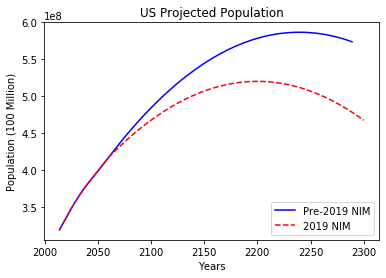

In [32]:
# plot data using line graph
ax, fig = plt.subplots()
#plt.plot(proj_year, proj_pop)
plt.title('US Projected Population')
plt.xlabel('Years')
plt.ylabel('Population (100 Million)')
current_nim = fig.plot(proj_year, proj_pop, color = "blue", label = "Pre-2019 NIM")
low_nim = fig.plot(nim_proj_year, nim_proj_pop, color = "red", linestyle='dashed', label = "2019 NIM")
plt.legend(loc="lower right")

In [56]:
ax.savefig("Resources/US_Projected_Population.png")
plt.show()